In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
df.shape

(414, 9)

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
# All columns are numeric in in form

df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [7]:
# There are no missing values in the dataset

df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [8]:
# There are no duplicate values present in the dataset

df.duplicated().sum()

0

In [9]:
# dropping column that does not seems usefull

df.drop('Transaction date',axis=1,inplace=True)

In [10]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [11]:
# As we can see data scaling is required as values of columns are in different range

df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


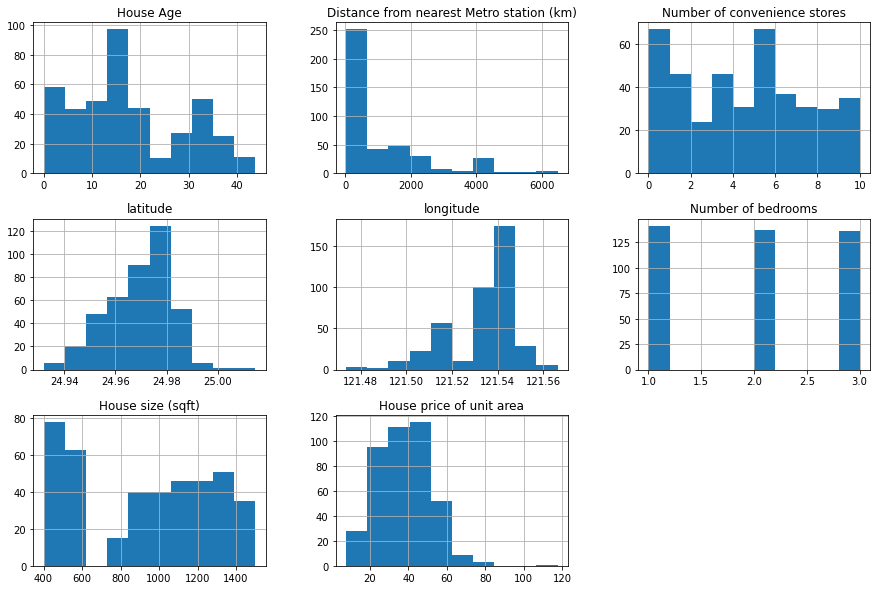

In [12]:
# checking distribution of each features

df.hist(figsize =(15,10));

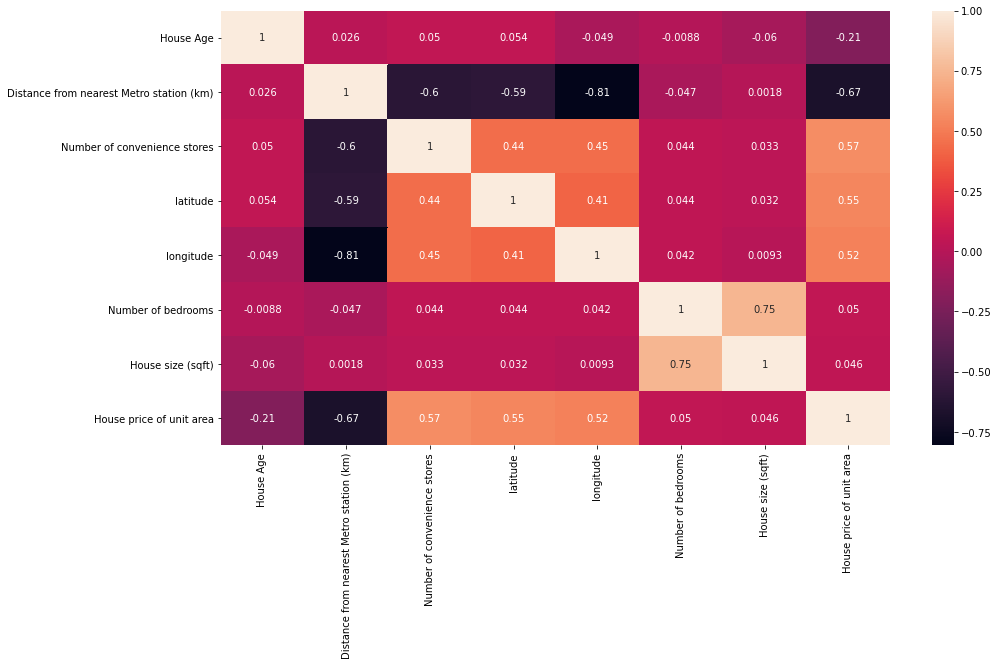

In [13]:
# Finding feature that is highly correlated with our target variable
# Distance from nearest Metro station (km) is significantly negatively correlated with our target variable


plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True);

In [14]:
# trying to make columns normaly distributed that are skewed by taking log of the column

df['Distance from nearest Metro station (km)'] = np.log(df['Distance from nearest Metro station (km)']+1)

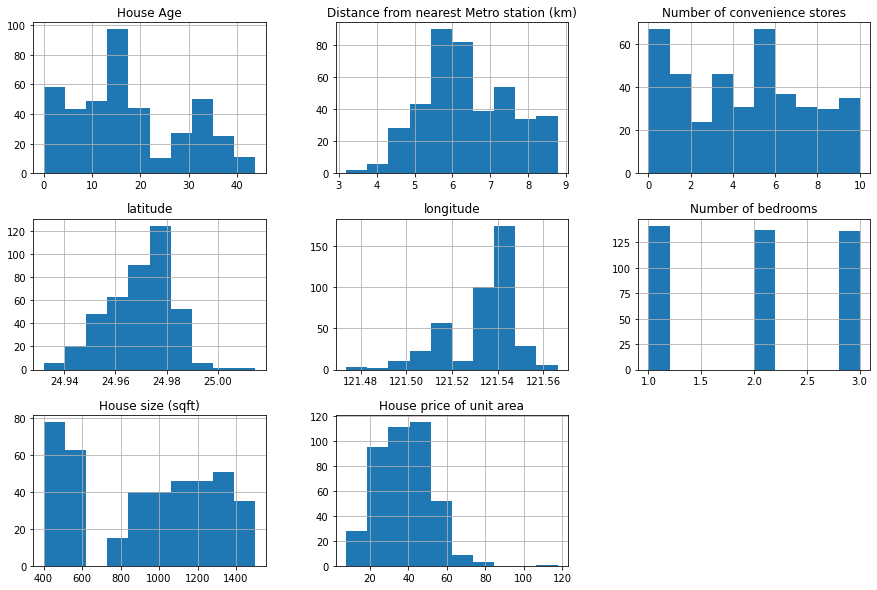

In [15]:
# histogram after using log on some columns

df.hist(figsize =(15,10));

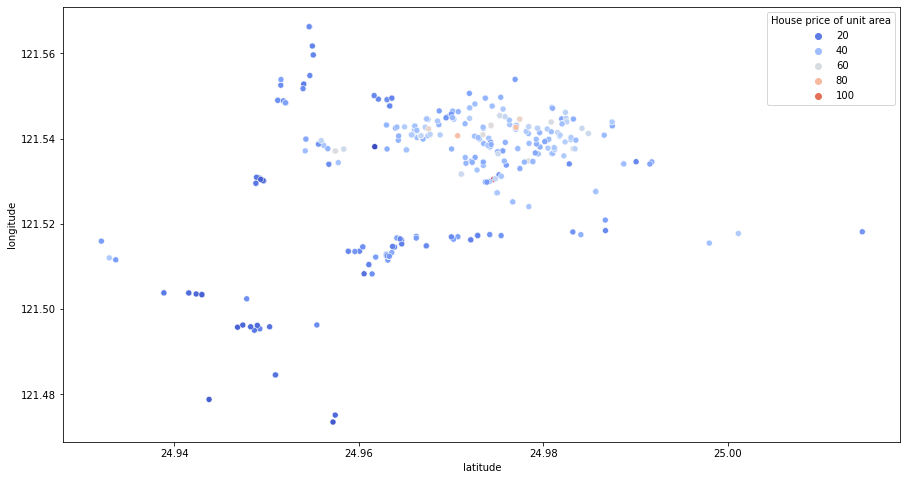

In [16]:
# There does not seems to be any influenece of latitude and longitude on house prices

plt.figure(figsize = (15,8))
sns.scatterplot(x='latitude',y='longitude',data=df,hue='House price of unit area',palette='coolwarm');

In [19]:
# Performing train and test split

from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('House price of unit area',axis=1)
y = df['House price of unit area'] 

In [21]:
# 30% test and 70% train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [22]:
X_train.shape

(289, 7)

In [23]:
X_test.shape

(125, 7)

In [24]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler 

In [25]:
std_scaler = StandardScaler() 

In [26]:
X_train_scaled = std_scaler.fit_transform(X_train)

In [27]:
X_test_scaled = std_scaler.transform(X_test)

In [28]:
# Model 1 - LinerRegressor

from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
# Training
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
reg.score(X_train_scaled,y_train)

0.6698901424277713

In [32]:
# Testing
reg.fit(X_test_scaled,y_test)

LinearRegression()

In [33]:
# Inference - Model is performing good in both train and test data

reg.score(X_test_scaled,y_test)

0.6144142037872078

In [34]:
# Model 2 - RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor()

In [36]:
# Training
rf.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [37]:
rf.score(X_train_scaled,y_train)

0.9597515483330485

In [38]:
# Testing
rf.fit(X_test_scaled,y_test)

RandomForestRegressor()

In [39]:
# Inference - Model is performing good in both train and test data

rf.score(X_test_scaled,y_test)

0.9334201006349311

In [40]:
predictions = rf.predict(X_test_scaled)

3.9168444758504304

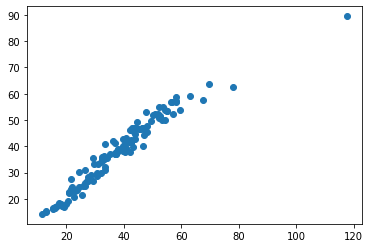

In [41]:
# since the shape is linear in format our model is predicting very well
# RMSE value is also very low - 0.27

plt.scatter(y_test,predictions);
np.sqrt(metrics.mean_squared_error(y_test,predictions))

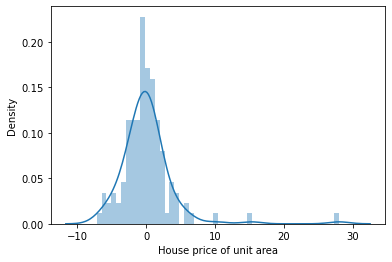

In [42]:
sns.distplot((y_test-predictions),bins=50);

In [43]:
# Model 3 - RandomForestRegressor with GridSearchCV

from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'n_estimators' : [100,150,200],
              'max_features' : [2,4,6]}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [45]:
# Training
grid_search.fit(X_train_scaled,y_train)   

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestRegressor(max_features=2, n_estimators=150)

In [47]:
best_rf.score(X_train_scaled,y_train)

0.9665138211722648

In [48]:
# Testing
best_rf.fit(X_test_scaled,y_test)   

RandomForestRegressor(max_features=2, n_estimators=150)

In [49]:
# Inference - Model is performing good in both train and test data

best_rf.score(X_train_scaled,y_train)

0.6985465196424074

In [50]:
# Conclusion
# Random Forest Regressor without hyper parameter tuning gives us the best score in both train and test

# train Score - 0.9597515483330485
# test score - 0.9334201006349311

In [51]:
# END